<a href="https://colab.research.google.com/github/Martin-William/extra/blob/master/LabO3analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Important Please run

In [13]:
#imports packages for below
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as s


In [46]:
def benford(data):
  return np.log10(1 + 1/data)

def fst_digits(data):
  i = 0 #sets a counter to 0
  d = np.zeros(len(data)) #creates an array the same lenght as pop
  #for the ith value in population converts the value to a string gets the first value of the string and replaces the ith value in d with the first value in the number
  while i<len(data):
    d[i] = int(str(data[i])[0])
    i += 1
  return d

#function to describe the graph shape, x is the array of x data from the file, height is the height of the gausian, mu is the average x positio of the gausian, sigma is the width of the gausian
def lobf(x, height, mu, sigma, bkg):
  return (height*(np.exp((-(x-mu)**2)/(2*(sigma)**2)))+bkg)

#function to describe the graph shape, x is the array of x data from the file, height is the height of the gausian, mu is the average x positio of the gausian, sigma is the width of the gausian
def Bi_Gaus(x, height1, mu1, sigma1, height2, mu2, sigma2, bkg):
  return height1*(np.exp((-(x-mu1)**2)/(2*(sigma1)**2))) + height2*(np.exp((-(x-mu2)**2)/(2*(sigma2)**2))) + bkg

Analysing LED1 Data



Gausians described by: height1*(np.exp((-(x-mu1)**2)/(2*(sigma1)**2))) + height2*(np.exp((-(x-mu2)**2)/(2*(sigma2)**2))) + bkg,
where h1:  0.0912270156290501 +/- 0.0023554705628486975 ,
mu1:  456.26890900328334 +/- 0.30369985407853567 ,
sigma1:  10.193248934436927 +/- 0.3165868017294856 ,
And h2:  0.16780237263586328 +/- 0.0012883295584390096 ,
mu2:  573.079005724425 +/- 0.37149937162663516 ,
sigma2:  50.80293814874829 +/- 0.5268312886123275 ,
bkg = 0 +/- 0


Gausians described by: (h*(np.exp((-(x-mu)**2)/(2*(sigma)**2)))+bkg), 
 For peak 1 
where h:  0.09191606380480159 +/- 0.0038873753557770786 ,
mu:  460.2319210536639 +/- 0.6240869626951216 ,
sigma:  15.42150444391474 +/- 0.899192459718206 ,
bkg = 0 +/- 0
 And peak 2, 
where h:  0.16469314879114427 +/- 0.0014490129652458882 ,
mu:  572.8158767987396 +/- 0.3853298745403113 ,
sigma:  49.47248418151151 +/- 0.5853725806636104 ,
bkg = 0 +/- 0


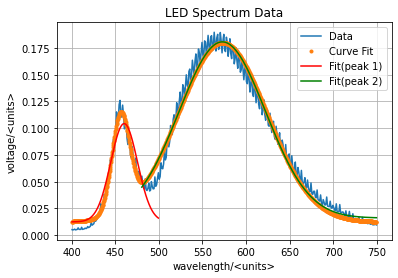

In [59]:
#gets the gile from the net and reads it into an array then seperates into 1D arrays for easy of access 
! wget -q https://raw.githubusercontent.com/Martin-William/extra/master/LED1%202_3_2022.csv
LED_data = pd.read_csv('LED1 2_3_2022.csv')

wavelength = LED_data['Wavelength (nm)']
voltage = LED_data['Voltage (V)']

#plots the data
plt.figure(0)
plt.plot(wavelength, voltage, label = 'Data')                


Blobf_vars = [0.120, 460, 10, 0.175, 560, 100, 0] #variables coresponding to height, mu, sigma and backgriund height 
opt_vars, goodfit = s.curve_fit(Bi_Gaus, wavelength, voltage, Blobf_vars) #fits a curve to the data (RaSft, Ref), using the curve generated by lobf with the variables from lobf_vars. refurns the optimal version of the variables in lobf_vars and how well thes fit as two arrays

x_array = np.linspace(min(wavelength),max(wavelength),num=1000) #creates array of x-axis data to generate the curve 
y_array = Bi_Gaus(x_array, *opt_vars) #creats array of y-axis data using the lobf function and the optimal variables returned by curve_fit

#plots the gausian and returns the information about the plot
plt.plot(x_array, y_array, '.', label ='Curve Fit') 
print ('\n\nGausians described by: height1*(np.exp((-(x-mu1)**2)/(2*(sigma1)**2))) + height2*(np.exp((-(x-mu2)**2)/(2*(sigma2)**2))) + bkg,\nwhere h1: ',opt_vars[0], '+/-', np.sqrt(goodfit.diagonal()[0]), ',\nmu1: ', opt_vars[1], '+/-', np.sqrt(goodfit.diagonal()[1]), ',\nsigma1: ', opt_vars[2], '+/-', np.sqrt(goodfit.diagonal()[2]), ',\nAnd h2: ',opt_vars[3], '+/-', np.sqrt(goodfit.diagonal()[3]), ',\nmu2: ', opt_vars[4], '+/-', np.sqrt(goodfit.diagonal()[4]), ',\nsigma2: ', opt_vars[5], '+/-', np.sqrt(goodfit.diagonal()[5]), ',\nbkg = 0 +/- 0') 



peak1w = np.concatenate([wavelength[:100]])
peak1v = np.concatenate([voltage[:100]])

lobf_vars = [0.125, 460, 50, 0] #variables coresponding to height, mu, sigma and backgriund height 
opt_vars, goodfit = s.curve_fit(lobf, peak1w, peak1v, lobf_vars) #fits a curve to the data (RaSft, Ref), using the curve generated by lobf with the variables from lobf_vars. refurns the optimal version of the variables in lobf_vars and how well thes fit as two arrays

x_array = np.linspace(min(peak1w),max(peak1w),num=1000) #creates array of x-axis data to generate the curve 
y_array = lobf(x_array, *opt_vars) #creats array of y-axis data using the lobf function and the optimal variables returned by curve_fit

#plots the gausian and returns the information about the plot
plt.plot(x_array, y_array, 'r', label ='Fit(peak 1)') 
print ('\n\nGausians described by: (h*(np.exp((-(x-mu)**2)/(2*(sigma)**2)))+bkg), \n For peak 1 \nwhere h: ',opt_vars[0], '+/-', np.sqrt(goodfit.diagonal()[0]), ',\nmu: ', opt_vars[1], '+/-', np.sqrt(goodfit.diagonal()[1]), ',\nsigma: ', opt_vars[2], '+/-', np.sqrt(goodfit.diagonal()[2]), ',\nbkg = 0 +/- 0') 



peak2w = np.concatenate([wavelength[80:]])
peak2v = np.concatenate([voltage[80:]])

lobf_vars = [0.175, 560, 100, 0] #variables coresponding to height, mu, sigma and backgriund height 
opt_vars, goodfit = s.curve_fit(lobf, peak2w, peak2v, lobf_vars) #fits a curve to the data (RaSft, Ref), using the curve generated by lobf with the variables from lobf_vars. refurns the optimal version of the variables in lobf_vars and how well thes fit as two arrays

x_array = np.linspace(min(peak2w),max(peak2w),num=1000) #creates array of x-axis data to generate the curve 
y_array = lobf(x_array, *opt_vars) #creats array of y-axis data using the lobf function and the optimal variables returned by curve_fit

#plots the gausian and returns the information about the plot
plt.plot(x_array, y_array, 'g', label ='Fit(peak 2)') 
print (' And peak 2, \nwhere h: ',opt_vars[0], '+/-', np.sqrt(goodfit.diagonal()[0]), ',\nmu: ', opt_vars[1], '+/-', np.sqrt(goodfit.diagonal()[1]), ',\nsigma: ', opt_vars[2], '+/-', np.sqrt(goodfit.diagonal()[2]), ',\nbkg = 0 +/- 0') 


#formatting
plt.xlabel('wavelength/<units>')
plt.ylabel('voltage/<units>')
plt.title('LED Spectrum Data')
plt.grid()
plt.legend(loc = 'upper right')   

Analysing Na1 Data



Gausians described by: height1*(np.exp((-(x-mu1)**2)/(2*(sigma1)**2))) + height2*(np.exp((-(x-mu2)**2)/(2*(sigma2)**2))) + bkg,
where h1:  0.11391670555500849 +/- 0.04507212413069207 ,
mu1:  588.5807770929798 +/- 0.12716384480609247 ,
sigma1:  0.5211045866636437 +/- 0.03325172193836406 ,
And h2:  0.1699340009098592 +/- 0.03750150936838822 ,
mu2:  589.3037314834012 +/- 0.12191181845799512 ,
sigma2:  0.5665287788890374 +/- 0.03553037347996776 ,
bkg = 0 +/- 0


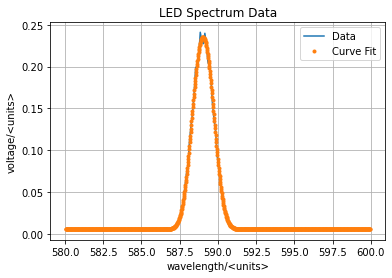

In [91]:
#gets the file from my github and reads it into an array then seperates into 1D arrays for easy of access 
! wget -q https://raw.githubusercontent.com/Martin-William/extra/master/Na1 2_3_2022.csv
Na1_data = pd.read_csv('Na1 2_3_2022.csv')

wavelength = Na1_data['Wavelength (nm)']
voltage = Na1_data['Voltage (V)']

#plots the data
plt.figure(0)
plt.plot(wavelength, voltage, label = 'Data')                


Blobf_vars = [0.12, 588.85, 0.7, 0.13, 589.15, 0.7, 0] #variables coresponding to height, mu, sigma and backgriund height 
opt_vars, goodfit = s.curve_fit(Bi_Gaus, wavelength, voltage, Blobf_vars) #fits a curve to the data (RaSft, Ref), using the curve generated by lobf with the variables from lobf_vars. refurns the optimal version of the variables in lobf_vars and how well thes fit as two arrays

x_array = np.linspace(min(wavelength),max(wavelength),num=1000) #creates array of x-axis data to generate the curve 
y_array = Bi_Gaus(x_array, *opt_vars) #creats array of y-axis data using the lobf function and the optimal variables returned by curve_fit

#plots the gausian and returns the information about the plot
plt.plot(x_array, y_array, '.', label ='Curve Fit') 
print ('\n\nGausians described by: height1*(np.exp((-(x-mu1)**2)/(2*(sigma1)**2))) + height2*(np.exp((-(x-mu2)**2)/(2*(sigma2)**2))) + bkg,\nwhere h1: ',opt_vars[0], '+/-', np.sqrt(goodfit.diagonal()[0]), ',\nmu1: ', opt_vars[1], '+/-', np.sqrt(goodfit.diagonal()[1]), ',\nsigma1: ', opt_vars[2], '+/-', np.sqrt(goodfit.diagonal()[2]), ',\nAnd h2: ',opt_vars[3], '+/-', np.sqrt(goodfit.diagonal()[3]), ',\nmu2: ', opt_vars[4], '+/-', np.sqrt(goodfit.diagonal()[4]), ',\nsigma2: ', opt_vars[5], '+/-', np.sqrt(goodfit.diagonal()[5]), ',\nbkg = 0 +/- 0') 



#formatting
plt.xlabel('wavelength/<units>')
plt.ylabel('voltage/<units>')
plt.title('LED Spectrum Data')
plt.grid()
plt.legend(loc = 'upper right') 


Analysing Na1 Data, above voltage 0.2V



Gausians described by: height1*(np.exp((-(x-mu1)**2)/(2*(sigma1)**2))) + height2*(np.exp((-(x-mu2)**2)/(2*(sigma2)**2))) + bkg,
where h1:  -0.04126647516491482 +/- 0.008959343307251426 ,
mu1:  588.6109855126291 +/- 0.030365033132408105 ,
sigma1:  0.10408001871173088 +/- 0.03932411656639011 ,
And h2:  -0.03772702945837142 +/- 0.01039870923442242 ,
mu2:  589.4107363339016 +/- 0.03439600220490239 ,
sigma2:  -0.08565854360757567 +/- 0.04994508300055548 ,
bkg = 0 +/- 0


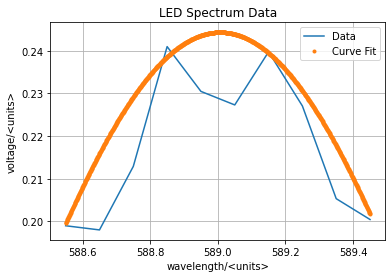

In [88]:
#gets the file from my github and reads it into an array then seperates into 1D arrays for easy of access 
! wget -q https://raw.githubusercontent.com/Martin-William/extra/master/Na1 2_3_2022.csv
Na1_data = pd.read_csv('Na1 2_3_2022.csv')

wavelength = Na1_data['Wavelength (nm)']
voltage = Na1_data['Voltage (V)']

wavelength = np.concatenate([wavelength[85:95]])
voltage = np.concatenate([voltage[85:95]])

#plots the data
plt.figure(0)
plt.plot(wavelength, voltage, label = 'Data')                

Blobf_vars = [0.24, 588.85, 1, 0.24, 589.15, 1, 0] #variables coresponding to height, mu, sigma and backgriund height 
opt_vars, goodfit = s.curve_fit(Bi_Gaus, wavelength, voltage, Blobf_vars) #fits a curve to the data (RaSft, Ref), using the curve generated by lobf with the variables from lobf_vars. refurns the optimal version of the variables in lobf_vars and how well thes fit as two arrays

x_array = np.linspace(min(wavelength),max(wavelength),num=1000) #creates array of x-axis data to generate the curve 
#y_array = Bi_Gaus(x_array, *opt_vars) #creats array of y-axis data using the lobf function and the optimal variables returned by curve_fit
y_array = Bi_Gaus(x_array, 0.12, 588.85, 0.7, 0.13, 589.15, 0.7, 0)

#plots the gausian and returns the information about the plot
plt.plot(x_array, y_array, '.', label ='Curve Fit') 
print ('\n\nGausians described by: height1*(np.exp((-(x-mu1)**2)/(2*(sigma1)**2))) + height2*(np.exp((-(x-mu2)**2)/(2*(sigma2)**2))) + bkg,\nwhere h1: ',opt_vars[0], '+/-', np.sqrt(goodfit.diagonal()[0]), ',\nmu1: ', opt_vars[1], '+/-', np.sqrt(goodfit.diagonal()[1]), ',\nsigma1: ', opt_vars[2], '+/-', np.sqrt(goodfit.diagonal()[2]), ',\nAnd h2: ',opt_vars[3], '+/-', np.sqrt(goodfit.diagonal()[3]), ',\nmu2: ', opt_vars[4], '+/-', np.sqrt(goodfit.diagonal()[4]), ',\nsigma2: ', opt_vars[5], '+/-', np.sqrt(goodfit.diagonal()[5]), ',\nbkg = 0 +/- 0') 



#formatting
plt.xlabel('wavelength/<units>')
plt.ylabel('voltage/<units>')
plt.title('LED Spectrum Data')
plt.grid()
plt.legend(loc = 'upper right') 

INSERT MAJOR CONFUSION

## Exercise 2

We will take a look at the "lighthouse problem". A lighthouse is at a distance `d` from the shore, and shines randomly in all directions. On the shore, we have photodetectors regularly spread looking out to sea. In those conditions, the number of light flashes a detector sees is given by a [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution) (also known as Lorentz) distribution.

The file [light_house_a.txt](https://raw.githubusercontent.com/PX2134/data/master/week5/light_house_a.txt) (URL for wget is https://raw.githubusercontent.com/PX2134/data/master/week5/light_house_a.txt) is a record of the count for each detector's position, with the error in that measurement for each detector. All distances are in kilometers. Note: that toy lighthouse seems to be about 5 kilometers from the shore.

1. [1] Plot the data in `light_house_a.txt`, count as a function of detector position. Include the error bars in the plot. _Hint:_ you can use for instance `errorbar()` from `matplotlib.pyplot`:
```python
plt.errorbar(position,count,yerr=sigma_count)
```
2. [2] Define a Cauchy function, which takes the positions of the detector as the variable and appropriate parameters to fit the data. You'll need a location parameter, a scale parameter, and an overall proportionality constant parameter.

3. [1] Plot the data and your Cauchy function on the same graph with some inital guesses for the parameters.

4. [2] Perform `curve_fit` on the data with your Cauchy function, ignoring for now the errors in the detector measurements (the sigma_count column).

5. [4] Now perform the same fit but with the errors, which you feed to `curve_fit()` with:
```python
curve_fit(cauchy, position, count, sigma=sigma_count,absolute_sigma=True)
```
`curve_fit` downweights the data points with a large error: comment on the difference between the two fits.

6. [4] Far off in the distance (so we don't have photodectors there) there's another lighthouse. Perform the same operations as above with [light_house_b.txt](https://raw.githubusercontent.com/PX2134/data/master/week5/light_house_b.txt). The fit will only include the data in the tail of the Cauchy distribution ...

In [ ]:
#gets the gile from the net and reads it into an array then seperates into 1D arrays for easy of access  
! wget -q https://raw.githubusercontent.com/PX2134/data/master/week5/light_house_a.txt
data = np.loadtxt('light_house_a.txt', skiprows = 1)
position = data[:,0]
count = data[:,1]
sigma_count = data[:,2]

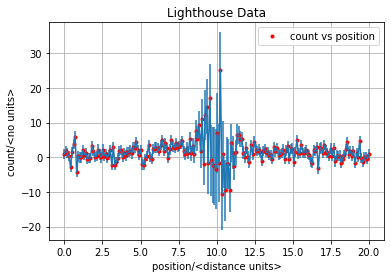

In [ ]:
#plots the data and formats the graph for referencing below
plt.plot(position, count, 'r.', label = 'count vs position')
plt.errorbar(position,count, yerr = sigma_count)
plt.xlabel('position/<distance units>')
plt.ylabel('count/<no units>')
plt.title('Lighthouse Data')
plt.grid()
plt.legend(loc = 'best')


The Cauchy Distribution is given by: 

$$f(x;x0,\gamma) = \frac{1}{\gamma \pi} \left(\frac{\gamma^2}{(x-x0)^2+\gamma^2} \right)$$

where x0 is the peak center in the x direction and $\gamma$ is the half width at half maximum. Additionaly the first term outside the bracket gives the amplitude of the equation.

$$A = \frac{1}{\gamma \pi}$$

In [ ]:
#creates a function based on the above text information
def Cau(x, A, x0, ga):
  return (A)*((ga**2)/((x-x0)**2 + ga**2))

x_array = np.linspace(min(position), max(position), num = 1000) #creates and axis to plot against, good to have it defined overall since a lot of things use it and i want to know where it is.


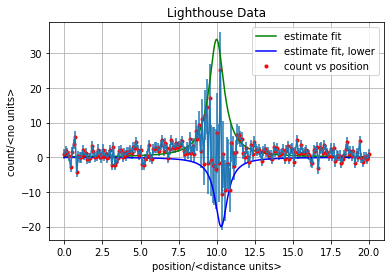

In [ ]:
#plotting cauchy distributions to fit the data and get an idea of initial values for curve fit later

var = [34, 10, .6] #guess values based on the above graph then edited in acordace with the graphg created by this cell
y_array = Cau(x_array, *var) #reates the y data based on the cauchy distribution and given variables

ud_var = [-20, 10.3, .5] #guess values based on the above graph then edited in acordace with the graphg created by this cell
ud_y_array = Cau(x_array, *ud_var) #reates the y data based on the cauchy distribution and given variables

plt.plot(x_array, y_array, 'g-', label = 'estimate fit') #plot of the distribution
plt.plot(x_array, ud_y_array, 'b-', label = 'estimate fit, lower') #upside down one because curious

#plots the actual data and its errorbars for reference 
plt.plot(position, count, 'r.', label = 'count vs position')
plt.errorbar(position,count, yerr = sigma_count, fmt = '') 
#formatting
plt.xlabel('position/<distance units>')
plt.ylabel('count/<no units>')
plt.title('Lighthouse Data')
plt.grid()
plt.legend(loc = 'upper right')
#plt.savefig('plot1.PDF') #can be saved if we want to


For the green fit, f(x) = (A)*((ga**2)/((x-x0)**2 + ga**2)), based of initial values 34, 10, .6, the fit returns:
A =  20.000000000000004 +/- 2.475105447817545
x0 =  10.000000000000002 +/- 0.0618744491795664
ga =  0.5000000000000001 +/- 0.08752410195447559

For the yellow fit, f(x) = (A)*((ga**2)/((x-x0)**2 + ga**2)), based of initial values -20, 10.3, .5, the fit returns:
A =  -10.000000000000002 +/- 2.4123506447118728
x0 =  10.71344864104232 +/- 0.09649138047229416
ga =  0.4000000000000001 +/- 0.13647628425841563 


For the blue fit with error, f(x) = (A)*((ga**2)/((x-x0)**2 + ga**2)), , the fit returns:
A =  3.367979033727028 +/- 0.5232163481969665
x0 =  9.292104648366013 +/- 0.37944307485560935
ga =  4.049598738984857 +/- 0.7111530666767532 



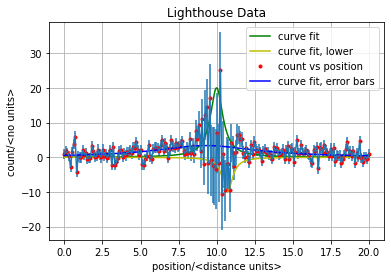

In [ ]:
# using the above information to fit the curves properly to the data

var = [34, 10, .6] #guess values based on the above graph
opt_var, er = s.curve_fit(Cau, position, count, var, bounds=([20, 10, .5],[40, 11, 1])) #fits a curve based on the Cauchy Dist. and the initial values
y_array = Cau(x_array, *opt_var)

ud_var = [-20, 10.3, .5] #guess values based on the above graph
opt_ud_var, ud_er = s.curve_fit(Cau, position, count, ud_var, bounds=([-20, 9, .4],[-10, 11, 1])) #fits a curve based on the Cauchy Dist. and the initial values
ud_y_array = Cau(x_array, *opt_ud_var)

plt.plot(x_array, y_array, 'g-', label = 'curve fit') #plots the distribution created by curve fit
plt.plot(x_array, ud_y_array, 'y-', label = 'curve fit, lower') #upside down one because curious

#plots the actual data and its errorbars for reference 
plt.plot(position, count, 'r.', label = 'count vs position')
plt.errorbar(position,count, yerr = sigma_count, fmt = '')

#returns information about the fits
print('\nFor the green fit, f(x) = (A)*((ga**2)/((x-x0)**2 + ga**2)), based of initial values 34, 10, .6, the fit returns:')
print ('A = ', opt_var[0], '+/-', np.sqrt(er.diagonal()[0])) 
print ('x0 = ', opt_var[1], '+/-', np.sqrt(er.diagonal()[1])) 
print ('ga = ', opt_var[2], '+/-', np.sqrt(er.diagonal()[2])) 

print('\nFor the yellow fit, f(x) = (A)*((ga**2)/((x-x0)**2 + ga**2)), based of initial values -20, 10.3, .5, the fit returns:')
print ('A = ', opt_ud_var[0], '+/-', np.sqrt(ud_er.diagonal()[0])) 
print ('x0 = ', opt_ud_var[1], '+/-', np.sqrt(ud_er.diagonal()[1])) 
print ('ga = ', opt_ud_var[2], '+/-', np.sqrt(ud_er.diagonal()[2]),'\n') 


# fitting the data using its error bars rather than variable found in the cell above
erfit_var, erfit_er = s.curve_fit(Cau, position, count, sigma=sigma_count, absolute_sigma=True)
erfit_y_array = Cau(x_array, *erfit_var)
plt.plot(x_array, erfit_y_array, 'b-', label = 'curve fit, error bars')

#returns information about the fit
print('\nFor the blue fit with error, f(x) = (A)*((ga**2)/((x-x0)**2 + ga**2)), , the fit returns:')
print ('A = ', erfit_var[0], '+/-', np.sqrt(erfit_er.diagonal()[0])) 
print ('x0 = ', erfit_var[1], '+/-', np.sqrt(erfit_er.diagonal()[1])) 
print ('ga = ', erfit_var[2], '+/-', np.sqrt(erfit_er.diagonal()[2]),'\n') 


#formatting and maybe saving
plt.xlabel('position/<distance units>')
plt.ylabel('count/<no units>')
plt.title('Lighthouse Data')
plt.grid()
#plt.xlim(5,15) #can zoom if you want
plt.legend(loc = 'upper right')
#plt.savefig('plot2.PDF')

In [ ]:
#as above but for file _b
! wget -q https://raw.githubusercontent.com/PX2134/data/master/week5/light_house_b.txt
data_b = np.loadtxt('light_house_b.txt', skiprows = 1)
position_b = data_b[:,0]
count_b = data_b[:,1]
sigma_count_b = data_b[:,2]

#redefines the x_array just in case since its used a lot and if i take this code elsewhere i dont wnat to loose it
x_array = np.linspace(min(position), max(position), num = 1000) #creates and axis to plot against

<ErrorbarContainer object of 3 artists>

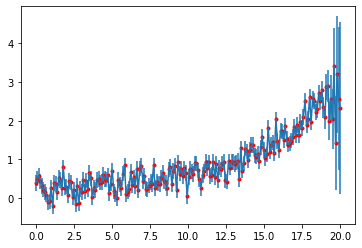

In [ ]:
# ploting to get an idea of the data
plt.plot(position_b, count_b, 'r.', label = 'count vs position')
plt.errorbar(position_b,count_b, yerr = sigma_count_b, fmt = '')


For the green fit, f(x) = (A)*((ga**2)/((x-x0)**2 + ga**2)), based of initial values -20, 10.3, .5, the fit returns:
A =  2.9149153983679614 +/- 0.27591904392150574
x0 =  21.69981222275602 +/- 0.7610624609538046
ga =  6.017494181702532 +/- 0.24873671432468888

For the blue fit with error, f(x) = (A)*((ga**2)/((x-x0)**2 + ga**2)), , the fit returns:
A =  5.4674410479346935 +/- 2.6477473472045574
x0 =  24.321769997521976 +/- 1.5156909968486398
ga =  5.108888783442299 +/- 0.8516285758020066 



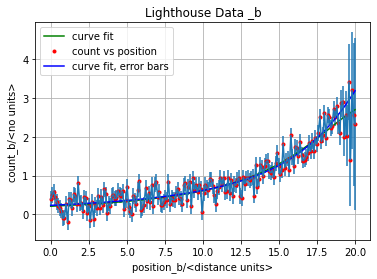

In [ ]:
#same as the curve fitting above but with no fit downwards and for the new data

#curve fit on the new data and creates new y distribution
var_b = [-20, 10.3, .5]
opt_var_b, er_b = s.curve_fit(Cau, position_b, count_b, var_b)
ud_y_array_b = Cau(x_array, *opt_var_b)

#plots the fit the data and the error bars
plt.plot(x_array, ud_y_array_b, 'g-', label = 'curve fit') 
plt.plot(position_b, count_b, 'r.', label = 'count vs position')
plt.errorbar(position_b,count_b, yerr = sigma_count_b, fmt = '')

#returns info about the plotted fit
print('\nFor the green fit, f(x) = (A)*((ga**2)/((x-x0)**2 + ga**2)), based of initial values -20, 10.3, .5, the fit returns:')
print ('A = ', opt_var_b[0], '+/-', np.sqrt(er_b.diagonal()[0])) 
print ('x0 = ', opt_var_b[1], '+/-', np.sqrt(er_b.diagonal()[1])) 
print ('ga = ', opt_var_b[2], '+/-', np.sqrt(er_b.diagonal()[2])) 

#fits using the error bars and plots the new distribution
erfit_var_b, erfit_er_b = s.curve_fit(Cau, position_b, count_b, sigma=sigma_count_b, absolute_sigma=True)
erfit_y_array_b = Cau(x_array, *erfit_var_b)
plt.plot(x_array, erfit_y_array_b, 'b-', label = 'curve fit, error bars')

#returns info about the plotted fit
print('\nFor the blue fit with error, f(x) = (A)*((ga**2)/((x-x0)**2 + ga**2)), , the fit returns:')
print ('A = ', erfit_var_b[0], '+/-', np.sqrt(erfit_er_b.diagonal()[0])) 
print ('x0 = ', erfit_var_b[1], '+/-', np.sqrt(erfit_er_b.diagonal()[1])) 
print ('ga = ', erfit_var_b[2], '+/-', np.sqrt(erfit_er_b.diagonal()[2]),'\n') 

#formatting and maybe save the graph
plt.xlabel('position_b/<distance units>')
plt.ylabel('count_b/<no units>')
plt.title('Lighthouse Data _b')
plt.grid()
#plt.xlim(5,15) #can zoom if you want
plt.legend(loc = 'upper left')
#plt.savefig('plot3.PDF')